# Routing Examples
This notebook contains examples of the functionality present in the OSMNX extension "routing".

In [1]:
import osmnx as ox
import networkx as nx
import time
from IPython.display import IFrame
import folium


%matplotlib inline
ox.config(log_file=True, log_console=True, use_cache=True)

### Example 1: Routing without Frequency Information
In this example, we create routing without frequency information, based on the default algorithm.

In [2]:
# to prevent this from taking forever, create the graph then load into route generator
streets = ox.graph_from_point((51.5208513, -0.1148912), 
                              distance=1000/1.75, network_type='walk')

In [84]:
# create 1 km route starting from (51.5208513, -0.1148912)
newroute = ox.generate_route(51.5208513, -0.1148912, 1, graph=streets)

In [4]:
# uncomment for static visualization
# visualize route overlaid on city map
# fig, ax = ox.plot_graph_route(streets, newroute, node_size=0)

In [5]:
# get information to add to plot
novel_segments, novel_length = ox.novelty_score(streets, newroute)
route_length = ox.total_route_length(streets, newroute)
message = '{:0.1f}km route containining {}/{} novel segments \
           (novelty: {:0.1f}km, {:0.1f}% of total length)'.format(route_length/1000,
                                     novel_segments,len(newroute)-1,
                                     novel_length/1000,100*novel_length/route_length)

In [6]:
route_color = '#7be1ed'
# plot the route with folium on top of the previously created graph_map
route_graph_map = ox.plot_route_folium(streets, newroute, 
                                       route_opacity=0.5,
                                       tiles = 'CartoDB dark_matter',
                                       route_color = route_color)

In [7]:
# add start/endpoint marker
icon_color = '#00d1ea'
folium.Marker([51.5208513, -0.1148912], popup=message,
              icon=folium.Icon(color='white',icon_color=icon_color,icon='child', 
                             prefix='fa')).add_to(route_graph_map)

In [8]:
# save as html file then display map as an iframe
filepath = 'data/route_graph_{:0.0f}.html'.format(time.time())
route_graph_map.save(filepath)
IFrame(filepath, width=800, height=500)

### Example 2: Routing with Frequency
Here, we read in past GPX tracks (see GPX Matching example notebook for more) to create a dictionary of which paths have been traversed.

_Note: For some reason, the frequency generation does not always work.  It seems to depend on the frequency of request as well as the number of points._

In [3]:
# read in gpx, view resultant frequency dictionary
folder = "/Users/heidihurst/Documents/UK/ucl-gis/ucl_msc/term2/networks/alltrax"
freq = ox.freq_from_folder(folder,npoints=400)
print(freq)

{(3438484456, 3438484455, 0): 1, (3438484455, 3438484454, 0): 1, (3438484454, 42514726, 0): 1, (42514726, 3438484453, 0): 1, (3438484453, 42514729, 0): 1, (42514729, 42514732, 0): 1, (42514732, 435549822, 0): 1, (435549822, 3438484452, 0): 1, (3438484452, 3438484451, 0): 1, (3438484451, 42514737, 0): 1, (42514737, 3438484450, 0): 1, (3438484450, 4612455663, 0): 1, (4612455663, 41215250, 0): 1, (41215250, 41710400, 0): 1, (41710400, 3438484445, 0): 1, (3438484445, 41440265, 0): 1, (41440265, 3438484444, 0): 1, (3438484444, 3438484443, 0): 1, (3438484443, 435552466, 0): 1, (3887413430, 3887413436, 0): 1, (3887413436, 3887413974, 0): 1, (3887413974, 3887413433, 0): 1, (3887413433, 3887413445, 0): 1, (3887413445, 3887413978, 0): 1, (3887413978, 3887413979, 0): 1, (3887413979, 3887413443, 0): 2, (3887413443, 3887413966, 0): 1, (3887413966, 3887413422, 0): 1, (3887413422, 3887413438, 0): 1, (3887413438, 3887413454, 0): 1, (3887413454, 3887413441, 0): 1, (3887413441, 3887413964, 0): 1, (38874

In [4]:
# to prevent rendering/creating the same graph more than once....
streets_freq = ox.graph_from_point((51.5223019,-0.1107007), 
                                   distance=10000/1.75, network_type='walk')

In [26]:
# create 10 km route starting from 51.5223019,-0.1107007
newroute_freq = ox.generate_route(51.5223019,-0.1107007, 10, graph = streets_freq)

In [ ]:
# uncomment for static visualization
# visualize route overlaid on city map (takes longer)
# fig, ax = ox.plot_graph_route(streets_freq, newroute_freq, node_size=0)

In [27]:
# get route stats to webmap
novel_segments, novel_length = ox.novelty_score(streets_freq, newroute_freq, freq)
route_length = ox.total_route_length(streets_freq, newroute_freq)
message = '{:0.1f}km route containining {}/{} novel segments \
           (novelty: {:0.1f}km, {:0.1f}% of total length)'.format(route_length/1000,
                                     novel_segments,len(newroute_freq)-1,
                                     novel_length/1000,100*novel_length/route_length)

In [28]:
route_color = '#7be1ed'
# plot the route with folium on top of the previously created graph_map
newroute_map = ox.plot_route_folium(streets_freq, newroute_freq, 
                                       route_opacity=0.5,
                                       tiles = 'CartoDB dark_matter',
                                       route_color = route_color)

In [29]:
# add start/end point to map, with route popup information
icon_color = '#00d1ea'
folium.Marker([51.5223019,-0.1107007], popup=message,
              icon=folium.Icon(color='white',icon_color=icon_color,icon='child', 
                             prefix='fa')).add_to(newroute_map)

In [30]:
# save as html file then display map as an iframe
filepath = 'data/long_route_{:.0f}.html'.format(time.time())
newroute_map.save(filepath)
IFrame(filepath, width=600, height=500)

### Sticking Points: Dead Ends
In most cases, the "simplify_graph" command removes all nodes that aren't intersections or dead ends.  In rare cases (usually at the edge of the map, though occasionally closer in) dead ends to not get appropriately addressed. One case is shown below.  While it is easy to tell if you are on the final segment of a dead end, it may not be easy to tell if you are on an intermediate segment of a dead end.  A fix has been implemented for these cases, where only one intermediate segment exists.

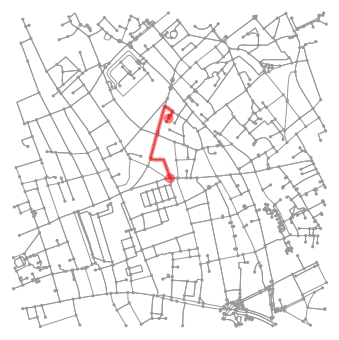

In [17]:
# example of dead end
problem_route = [11546253, 18670874,25497664,25497878,877245092,1159495421]
streets = ox.graph_from_point((51.5223019,-0.1107007), distance=1000/1.75)
fig, ax = ox.plot_graph_route(streets, problem_route, node_size=10)

### Example 3: Route Novelty
Determine how novel the route obtained above is.

In [18]:
novel_segments, novel_length = ox.novelty_score(streets, newroute_freq, freq)
route_length = ox.total_route_length(streets, newroute_freq)
message = 'Route contains {}/{} novel segments, accounting for {:0.2}km \
           ({:0.1f}% of the total length)'
print(message.format(novel_segments,len(newroute_freq)-1,novel_length/1000,100*novel_length/route_length))

Route contains 262/262 novel segments, accounting for 4.4km            (100.0% of the total length)


### Create Folium Polyline?


In [38]:
# create folium map
# 629099004, 244668080, 0
streets_freq[629099004][244668080][0]

{'osmid': 49513439,
 'name': 'Baldwin Terrace',
 'highway': 'unclassified',
 'oneway': False,
 'length': 103.897,
 'bearing': 240.515}

In [5]:
import pandas
import numpy as np

In [71]:
# import from new folder
folder = 'london/'
freq2 = ox.freq_from_folder(folder,npoints=400)
print(freq2)

{(3438484456, 3438484455, 0): 1, (3438484455, 3438484454, 0): 1, (3438484454, 42514726, 0): 1, (42514726, 3438484453, 0): 1, (3438484453, 42514729, 0): 1, (42514729, 42514732, 0): 1, (42514732, 435549822, 0): 1, (435549822, 3438484452, 0): 1, (3438484452, 3438484451, 0): 1, (3438484451, 42514737, 0): 1, (42514737, 3438484450, 0): 1, (3438484450, 4612455663, 0): 1, (4612455663, 41215250, 0): 1, (41215250, 41710400, 0): 1, (41710400, 3438484445, 0): 1, (3438484445, 41440265, 0): 1, (41440265, 3438484444, 0): 1, (3438484444, 3438484443, 0): 1, (3438484443, 435552466, 0): 1, (3887413430, 3887413436, 0): 1, (3887413436, 3887413974, 0): 1, (3887413974, 3887413433, 0): 1, (3887413433, 3887413445, 0): 1, (3887413445, 3887413978, 0): 1, (3887413978, 3887413979, 0): 1, (3887413979, 3887413443, 0): 2, (3887413443, 3887413966, 0): 1, (3887413966, 3887413422, 0): 1, (3887413422, 3887413438, 0): 1, (3887413438, 3887413454, 0): 1, (3887413454, 3887413441, 0): 1, (3887413441, 3887413964, 0): 1, (38874

In [36]:
streets_freq_gdf = ox.graph_to_gdfs(streets_freq,nodes=False,fill_edge_geometry=True)

In [74]:
streets_freq_gdf

,access,area,bridge,est_width,geometry,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,ref,service,tunnel,u,v,width
0,NaN,NaN,NaN,NaN,"LINESTRING (-0.06847300000000001 51.4739135, -...",trunk,NaN,0,NaN,9.989,20 mph,Peckham High Street,False,241822649,A202,NaN,NaN,2661416968,1936671442,NaN
1,NaN,NaN,NaN,NaN,"LINESTRING (-0.06847300000000001 51.4739135, -...",trunk_link,NaN,0,NaN,13.192,20 mph,Peckham High Street,False,51979121,B215,NaN,NaN,2661416968,399040437,NaN
2,NaN,NaN,NaN,NaN,"LINESTRING (-0.06847300000000001 51.4739135, -...",trunk,NaN,0,NaN,26.668,20 mph,Peckham High Street,False,260621252,A202,NaN,NaN,2661416968,1549493663,NaN
3,NaN,NaN,NaN,NaN,"LINESTRING (-0.06847300000000001 51.4739135, -...",trunk_link,NaN,0,NaN,8.504,20 mph,Peckham High Street,False,260621253,B215,NaN,NaN,2661416968,1936671458,NaN
4,NaN,NaN,NaN,NaN,"LINESTRING (-0.0356379 51.5149134, -0.0360149 ...",residential,NaN,0,NaN,27.502,20 mph,Parnham Street,False,19616545,NaN,NaN,NaN,203685897,203685287,NaN
5,NaN,NaN,NaN,NaN,"LINESTRING (-0.0356379 51.5149134, -0.0356437 ...",residential,NaN,0,NaN,6.373,20 mph,Carr Street,False,372794106,NaN,NaN,NaN,203685897,2556792779,NaN
6,NaN,NaN,NaN,NaN,"LINESTRING (-0.0356379 51.5149134, -0.0352057 ...",residential,NaN,0,NaN,33.809,20 mph,Parnham Street,False,372794107,NaN,NaN,NaN,203685897,2556792777,NaN
7,NaN,NaN,NaN,NaN,"LINESTRING (-0.0356379 51.5149134, -0.0356126 ...",residential,NaN,0,NaN,46.968,20 mph,Carr Street,False,372794395,NaN,NaN,NaN,203685897,27079400,NaN
8,NaN,NaN,NaN,NaN,"LINESTRING (-0.0859255 51.5233167, -0.0862019 ...",unclassified,NaN,0,NaN,19.124,20 mph,Epworth Street,False,4254079,NaN,NaN,NaN,1703018508,109418,NaN
9,NaN,NaN,NaN,NaN,"LINESTRING (-0.0859255 51.5233167, -0.0846008 ...",unclassified,NaN,0,NaN,108.983,20 mph,Epworth Street,False,4254079,NaN,NaN,NaN,1703018508,110152,NaN


In [75]:
# need to query on u and v
#u=265489757
#v=1298309059
u=1210187738
v=1210187696
index = [streets_freq_gdf[(streets_freq_gdf['u'] == u) & (streets_freq_gdf['v'] == v)].index[0]]
# 
#s1 = streets_freq_gdf.loc[(streets_freq_gdf['u']==629099004) & (streets_freq_gdf['v']==244668080)]

In [76]:
index

[138903]

In [39]:
s1 = streets_freq_gdf.loc[index]

In [44]:
for _, row in s1.iterrows():
    pl = ox.make_folium_polyline(edge=row, edge_color='#7be1ed', edge_width=5, 
                          edge_opacity=0.3, popup_attribute='osmid')

In [45]:
# create new folium map
freq_map = ox.plot_graph_folium(streets, tiles = 'CartoDB dark_matter', edge_opacity=0)

In [46]:
# add polyline to map
# pl = ox.make_folium_polyline(s1, edge_color='#7be1ed', edge_width=5, edge_opacity=0.3)
pl.add_to(freq_map)

In [33]:
#s1['geometry']
#from shapely.geometry import LineString

In [35]:
#s1['geometry']

87877    LINESTRING (-0.0957554 51.5335079, -0.09706289...
Name: geometry, dtype: object

In [47]:
# save and display
filepath = 'data/freq_map_{:.0f}.html'.format(time.time())
freq_map.save(filepath)
IFrame(filepath, width=600, height=500)

In [82]:
pts = []
for k in freq2.keys():
    pts.append((k[1],k[0]))

In [57]:
gdf_edges = ox.graph_to_gdfs(streets_freq, nodes=False, fill_edge_geometry=True)

    # read in frequency keys to list
pts = []
for k in freq.keys():
    pts.append((k[0], k[1]))

In [78]:
index = [gdf_edges[(gdf_edges['u'] == u) & (gdf_edges['v'] == v)].index[0] for u, v in pts]

IndexError: index 0 is out of bounds for axis 0 with size 0

163

In [70]:
gdf_edges[(gdf_edges['u'] == 3438484455) & (gdf_edges['v'] == 3438484454)]

,access,area,bridge,est_width,geometry,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,ref,service,tunnel,u,v,width


In [83]:
# need to do this in a loop with exception handling, 
# as edges in freq dict may not be in graph
index = []
i = 0
for u,v in pts:
    try:
        index.append(gdf_edges[(gdf_edges['u'] == u) & (gdf_edges['v'] == v)].index[0])
    except IndexError:
        print("Index error on edge {} {}".format(u,v))
        i += 1
        pass
print("Failed to locate {} edges out of {}".format(i,len(pts)))

Index error on edge 3438484455 3438484456
Index error on edge 3438484454 3438484455
Index error on edge 42514726 3438484454
Index error on edge 3438484453 42514726
Index error on edge 42514729 3438484453
Index error on edge 42514732 42514729
Index error on edge 435549822 42514732
Index error on edge 3438484452 435549822
Index error on edge 3438484451 3438484452
Index error on edge 42514737 3438484451
Index error on edge 3438484450 42514737
Index error on edge 4612455663 3438484450
Index error on edge 41215250 4612455663
Index error on edge 41710400 41215250
Index error on edge 3438484445 41710400
Index error on edge 41440265 3438484445
Index error on edge 3438484444 41440265
Index error on edge 3438484443 3438484444
Index error on edge 435552466 3438484443
Index error on edge 3887413436 3887413430
Index error on edge 3887413974 3887413436
Index error on edge 3887413433 3887413974
Index error on edge 3887413445 3887413433
Index error on edge 3887413978 3887413445
Index error on edge 388

In [68]:
gdf_edges.loc[index]

,access,area,bridge,est_width,geometry,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,ref,service,tunnel,u,v,width


## Scratch for Coursework

In [109]:
# parameters for our route
start_lat = 51.522462 #51.524269
start_lon = -0.132630 #-0.134572
goal_length = 5 # in km
freq_folder = 'london/' # relative path of folder of gpx tracks, or leave as empty string

# parameters for our visualization
route_color = '#7be1ed'
icon_color = '#00d1ea'
map_tiles = 'CartoDB dark_matter'

In [110]:
# get frequency dictionary
freq_time = time.time()
freq = ox.freq_from_folder(freq_folder,npoints=250)
print(time.time()-freq_time)

0.11728501319885254


In [111]:
freq_time = time.time()
freq = ox.freq_from_folder('alltrax/',npoints=250)
print(time.time()-freq_time)

3.4675955772399902


In [112]:
# create street map around our start point
street_time = time.time()
streets_small = ox.graph_from_point((start_lat, start_lon), 
                              distance=goal_length*1000/1.75, network_type='walk')
print(time.time()-street_time)

26.904954195022583


In [119]:
# create street map around our start point
street_time = time.time()
streets = ox.graph_from_point((start_lat, start_lon), 
                              distance=10*1000/1.75, network_type='walk')
print(time.time()-street_time)

76.08142685890198


In [124]:
# create a route!
longroute_time = time.time()
newroute = ox.generate_route(start_lat, start_lon, 10, graph=streets)
print(time.time()-longroute_time)

9.265324115753174


In [125]:
display_time = time.time()

In [126]:
# get metrics about route novelty to add to map
novel_segments, novel_length = ox.novelty_score(streets, newroute)
route_length = ox.total_route_length(streets, newroute)
message = '{:0.1f}km route containining {}/{} novel segments \
           (novelty: {:0.1f}km, {:0.1f}% of total length)'.format(route_length/1000,
                                     novel_segments,len(newroute)-1,
                                     novel_length/1000,100*novel_length/route_length)

In [127]:
# plot the route with folium on top of the previously created graph_map
route_graph_map = ox.plot_route_folium(streets, newroute, 
                                       route_opacity=0.5,
                                       tiles = map_tiles,
                                       route_color = route_color)

In [128]:
# add start/endpoint marker
folium.Marker([start_lat, start_lon], popup=message,
              icon=folium.Icon(color='white',icon_color=icon_color,icon='child', 
                             prefix='fa')).add_to(route_graph_map)

In [129]:
# save as html file then display map in IPython as an iframe
filepath = 'data/example_route_{:0.0f}.html'.format(time.time())
route_graph_map.save(filepath)
IFrame(filepath, width=800, height=500)

In [130]:
print(time.time()-display_time)

9.99639081954956
